## Анализ эффективности удержания

1. В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:

state — штат США

account_length — длительность использования аккаунта

area_code — деление пользователей на псевдорегионы, использующееся в телекоме

intl_plan — подключена ли у пользователя услуга международного общения

vmail_plan — подключена ли у пользователя услуга голосовых сообщений

vmail_message — количество голосых сообщений, который пользователь отправил / принял

day_calls — сколько пользователь совершил дневных звонков

day_mins — сколько пользователь проговорил минут в течение дня

day_charge — сколько пользователь заплатил за свою дневную активность

eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности

night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности

intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения

custserv_calls — сколько раз пользователь позвонил в службу поддержки

treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)

mes_estim — оценка интенсивности пользования интернет мессенджерами

churn — результат оттока: перестал ли абонент пользоваться услугами оператора

Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции
scipy.stats.chi2_contingency(subtable, correction=False)

Сколько достигаемых уровней значимости оказались меньше, чем α=0.05?

In [4]:
import pandas as pd
from scipy import stats

In [9]:
import scipy

In [76]:
import seaborn as sns

In [33]:
%matplotlib inline

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('churn_analysis.csv')
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [17]:
data.shape

(3333, 23)

In [15]:
data['churn'] = data['churn'].map({'False.': 0, 'True.': 1})

In [16]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [18]:
treat = data[data['treatment'] == 1]


In [19]:
treat.shape

(1097, 23)

In [25]:
states = pd.crosstab(treat['state'], treat['churn']).T

In [26]:
states

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
0,19,25,11,17,10,17,25,18,16,18,...,20,11,14,18,20,18,16,22,27,20
1,1,5,5,2,5,5,5,1,1,2,...,3,1,6,4,3,5,7,2,5,2


In [27]:
states.shape

(2, 51)

In [45]:
scipy.stats.chi2_contingency(states.iloc[:,[0,50]], correction=False)[1]

0.6071570197815258

In [56]:
scipy.stats.chi2_contingency(states)

(44.05271236692549,
 0.709759004277847,
 50,
 array([[16.7183227 , 25.07748405, 13.37465816, 15.88240656, 12.53874202,
         18.39015497, 25.07748405, 15.88240656, 14.21057429, 16.7183227 ,
         17.55423883, 10.86690975, 12.53874202, 15.04649043, 10.03099362,
         19.2260711 , 20.89790337, 20.89790337, 12.53874202, 20.06198724,
         20.06198724, 23.40565178, 18.39015497, 17.55423883, 17.55423883,
         20.06198724, 21.73381951, 15.88240656, 20.06198724, 20.06198724,
         10.03099362, 20.06198724, 24.24156791, 20.06198724, 27.58523245,
         20.06198724, 10.86690975, 17.55423883, 15.04649043, 18.39015497,
         17.55423883, 19.2260711 , 10.03099362, 16.7183227 , 18.39015497,
         19.2260711 , 19.2260711 , 19.2260711 , 20.06198724, 26.74931632,
         18.39015497],
        [ 3.2816773 ,  4.92251595,  2.62534184,  3.11759344,  2.46125798,
          3.60984503,  4.92251595,  3.11759344,  2.78942571,  3.2816773 ,
          3.44576117,  2.13309025,  2.461257

In [57]:
p0 = []
for i in range(50):
    for j in range (i+1, 51):
        p0.append(scipy.stats.chi2_contingency(states.iloc[:,[i,j]], correction=False)[1])

In [58]:
sum(np.array(p0) < 0.05)

34

**Вопрос 3**
В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в таблице сопряженности может быть аппроксимировано с помощью непрерывного распределения xи-квадрат. Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Одним из способов коррекции точности аппроксимации является поправка Йетса на непрерывность.

Эта поправка обычно используется для таблиц сопряженности размером 2x2 и для небольшого количества наблюдений. Такая поправка, однако, не является серебрянной пулей, и часто критикуется за то, что статистический критерий при ее использовании становится слишком консервативным, то есть часто не отвергает нулевую гипотезу там, где она неверна (совершает ошибку II рода).

Полезно знать, что эта поправка часто включена по умолчанию (например, в функции scipy.stats.chi2_contingency) и понимать ее влияние на оценку достигаемого уровня значимости.

Проведите те же самые сравнения, что и в вопросе №1, только с включенной коррекцией

In [48]:
p = []
for i in range(50):
    for j in range (i+1, 51):
        p.append(scipy.stats.chi2_contingency(states.iloc[:,[i,j]])[1])

In [50]:
len(p)

1275

In [60]:
sum(np.array(p) >= np.array(p0))

1083

In [53]:
sum(np.array(p) < 0.05)

0

In [62]:
sum(np.array(p0)) / 1275

0.5018273798739158

In [61]:
sum(np.array(p)) / 1275

0.6640566382051047

**Вопрос 4**
Что если у нас мало данных, мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку, предположения критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно ?

В таком случае прибегают к так называемому точному критерию Фишера. Этот критерий не использует приближений и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

Посчитайте для каждой пары штатов, как и в первом задании, достигаемый уровень значимости с помощью точного критерия Фишера и сравните получившиеся значения с двумя другими подходами, описанными выше.

Точный критерий Фишера удобно вычислять с помощью функции
scipy.stats.fisher_exact

In [63]:
scipy.stats.fisher_exact?

In [67]:
scipy.stats.fisher_exact(states.iloc[:,[0,49]])[1]

0.386654825596359

In [68]:
p_fisher = []
for i in range(50):
    for j in range (i+1, 51):
        p_fisher.append(scipy.stats.fisher_exact(states.iloc[:,[i,j]])[1])

In [71]:
sum(p_fisher) / 1275 # среднее значение точного критерия Фишера

0.6483383060020681

In [72]:
sum(p0) / 1275 # среднее значение хи-квадрат без поправки

0.5018273798739158

In [73]:
sum(p) / 1275 # среднее значение хи-квадрат с поправкой Йетса

0.6640566382051047

**Вопрос 5**
Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.


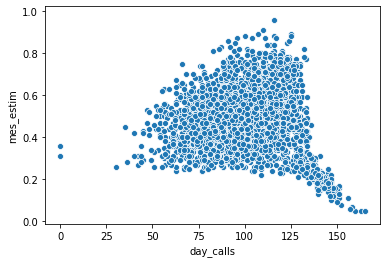

In [79]:
sns.scatterplot(x = 'day_calls', y = 'mes_estim', data = data)

In [74]:
corr_pearson = data[['day_calls', 'mes_estim']].corr()
corr_pearson

,day_calls,mes_estim
day_calls,1.000000,-0.051794
mes_estim,-0.051794,1.000000


In [81]:
corr_pearson.iloc[0,1]

-0.051794350587572605

In [89]:
r = corr_pearson.iloc[0,1]
n = data.shape[0]
T = r * np.sqrt(n-2) / np.sqrt(1 - r ** 2) 

In [90]:
T # значение статистики

-2.993319137573968

In [96]:
stats.norm.cdf(T)

0.001379805086031505

In [98]:
stats.t.cdf(T, n-2)

0.0013899418434888647

In [99]:
# значимость корреляции проверятеся с помощью статистического критерия Стьюдента
# Если нулевая гипотеза справедлива, то есть, корреляции нет, эта статистика имеет распределение Стью-
# дента с числом степеней свободы n−2

**Вопрос 6** Еще раз рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Спирмена между этими признаками на всех данных, ее значимость.

In [75]:
corr_spearman = data[['day_calls', 'mes_estim']].corr('spearman')
corr_spearman

,day_calls,mes_estim
day_calls,1.00000,0.04335
mes_estim,0.04335,1.00000


In [100]:
r = corr_spearman.iloc[0,1]
n = data.shape[0]
T = r * np.sqrt(n-2) / np.sqrt(1 - r ** 2) 
T

2.5042845313829765

In [101]:
stats.norm.cdf(T)

0.9938650342187388

In [102]:
stats.t.cdf(T, n-2)

0.9938413164054147

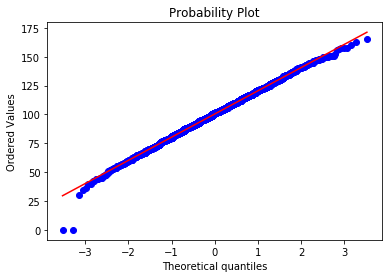

In [103]:
scipy.stats.probplot(data['day_calls'].values, dist="norm", plot= pylab)
pylab.show()

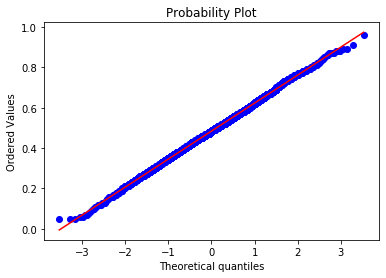

In [104]:
scipy.stats.probplot(data['mes_estim'].values, dist="norm", plot= pylab)
pylab.show()

In [105]:
scipy.stats.probplot?

**Вопрос 8**
Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

In [106]:
hi = scipy.stats.chi2_contingency(states)

In [114]:
hi[0], hi[1]

(44.05271236692549, 0.709759004277847)

In [112]:
treat.shape[0]

1097

In [111]:
sum(sum(states))

1097

In [113]:
koef_kramera = np.sqrt(hi[0] / treat.shape[0])
koef_kramera

0.2003932150203332

In [115]:
scipy.stats.chi2?

**Вопрос 9**
Вы прослушали большой курс и к текущему моменту обладете достаточными знаниями, чтобы попытаться самостоятельно выбрать нужный метод / инструмент / статистический критерий и сделать правильное заключение.

В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2) !

In [116]:
treat0 = data[data['treatment'] == 0]
treat2 = data[data['treatment'] == 2]

In [118]:
treat_churn = data.groupby('treatment')['churn'].sum()

In [119]:
treat_churn

treatment
0    165
1    180
2    138
Name: churn, dtype: int64

In [120]:
treat0.shape, treat2.shape, treat.shape

((1133, 23), (1103, 23), (1097, 23))

In [122]:
stats.mannwhitneyu(treat['churn'], treat0['churn'], alternative = 'two-sided')

MannwhitneyuResult(statistic=632918.0, pvalue=0.22845579453940912)

In [123]:
stats.mannwhitneyu(treat['churn'], treat2['churn'], alternative = 'two-sided')

MannwhitneyuResult(statistic=628572.5, pvalue=0.009365687819032503)

In [126]:
p = [stats.mannwhitneyu(treat['churn'], treat0['churn'], alternative = 'two-sided')[1], 
    stats.mannwhitneyu(treat['churn'], treat2['churn'], alternative = 'two-sided')[1]]
p

[0.22845579453940912, 0.009365687819032503]

In [127]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [128]:
reject, p_corrected, a1, a2 = multipletests(p, 
                                            alpha = 0.05 / 2, 
                                            method = 'holm') 

In [129]:
reject

array([False,  True])

In [130]:
p_corrected

array([0.22845579, 0.01873138])

In [131]:
stats.mannwhitneyu(treat0['churn'], treat2['churn'], alternative = 'two-sided')

MannwhitneyuResult(statistic=637670.0, pvalue=0.1565335063039474)